Runtime performance analysis of pretrained networks
============================================

From torchvision.

Goal is 30 fps on single cpu core on i7 2600k

In [1]:
import timeit
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
# can use the below import should you choose to initialize the weights of your Net
import torch.nn.init as I
import torchvision.models

from matplotlib import pyplot

torch.set_num_threads(1)

In [2]:
def backbone_output_sizes(backbone, input_range):
    """
    Iterate over sizes of the last feature maps, respectively.
    """
    with torch.no_grad():
        for sz in input_range:
            x = torch.rand(1, 3, sz, 224)
            y = backbone(x)
            yield y.shape[2]

def time_backbone(backbone, sz):
    """
    Meaure inference time of the convolutional layers
    """
    with torch.no_grad():
        N = 10
        x = torch.rand(1, 3, sz, sz)
        time = timeit.timeit('backbone(x)', number=N, globals={'backbone' : backbone, 'x' : x})
        print (f"Inference time: {time/N*1000:.0f} ms averaged over {N} runs")

In [3]:
net = torchvision.models.mnasnet1_0()
net.eval()
backbone_mnasnet1_0 = [*net.children()][0]

<BarContainer object of 30 artists>

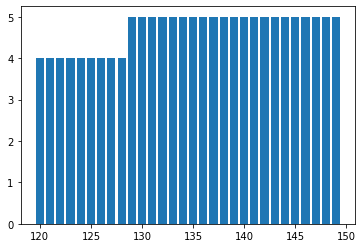

In [4]:
# Looking at the feature map size at the end of the convolutional backbone.
# When the size change from a small value to the next larger value, there should
# be no asymmetry between the borders of the input image.
# (See Alsallakh et al. (2020) "MIND THE PAD – CNNS CAN DEVELOP BLIND SPOTS")
# I think symmetry is nice so I set the input size to 129 which seems to
# be the threshold for all networks. The default 224 is too big, runs 
# much much too slowly. So what is a good smaller size??

xs = np.arange(120, 150)
ys = np.fromiter(backbone_output_sizes(backbone_mnasnet1_0, xs), dtype='i')
pyplot.bar(xs, ys)

In [5]:
time_backbone(backbone_mnasnet1_0, 129)

Inference time: 24 ms averaged over 10 runs


In [6]:
del backbone_mnasnet1_0

In [7]:
net = torchvision.models.mnasnet1_3()
net.eval()
backbone_mnasnet1_3 = [*net.children()][0]

<BarContainer object of 30 artists>

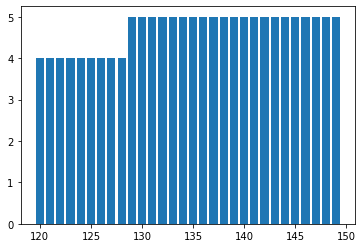

In [8]:
ys = np.fromiter(backbone_output_sizes(backbone_mnasnet1_3, xs), dtype='i')
pyplot.bar(xs, ys)

In [9]:
time_backbone(backbone_mnasnet1_3, 129)

Inference time: 30 ms averaged over 10 runs


In [10]:
del backbone_mnasnet1_3

In [11]:
net = torchvision.models.mnasnet0_5()
net.eval()
backbone_mnasnet0_5 = [*net.children()][0]

<BarContainer object of 30 artists>

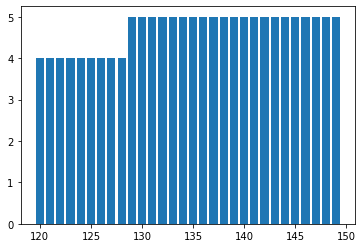

In [12]:
ys = np.fromiter(backbone_output_sizes(backbone_mnasnet0_5, xs), dtype='i')
pyplot.bar(xs, ys)

In [13]:
time_backbone(backbone_mnasnet0_5, 129)

Inference time: 14 ms averaged over 10 runs


In [14]:
del backbone_mnasnet0_5

In [15]:
net = torchvision.models.mobilenet_v2()
net.eval()
backbone_mobilnet_v2 = [*net.children()][0]
#backbone_mobilnet_v2

<BarContainer object of 30 artists>

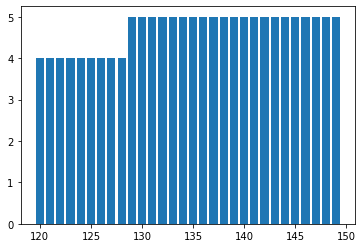

In [16]:
ys = np.fromiter(backbone_output_sizes(backbone_mobilnet_v2, xs), dtype='i')
pyplot.bar(xs, ys)

In [17]:
time_backbone(backbone_mobilnet_v2, 129)

Inference time: 24 ms averaged over 10 runs


In [18]:
del backbone_mobilnet_v2

In [19]:
net = torchvision.models.resnet18()
net.eval()
backbone_resnet18 = nn.Sequential(*[*net.children()][:-2])
#backbone_resnet18

<BarContainer object of 30 artists>

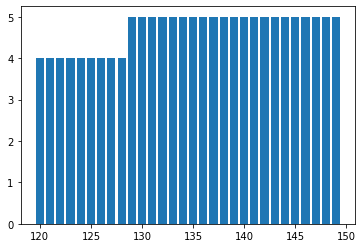

In [20]:
ys = np.fromiter(backbone_output_sizes(backbone_resnet18, xs), dtype='i')
pyplot.bar(xs, ys)

In [21]:
time_backbone(backbone_resnet18, 129)

Inference time: 48 ms averaged over 10 runs


In [22]:
del backbone_resnet18

In [23]:
net = torchvision.models.shufflenet_v2_x0_5()
net.eval()
backbone_shufflenet_v2_x0_5 = nn.Sequential(*[*net.children()][:-1])

<BarContainer object of 30 artists>

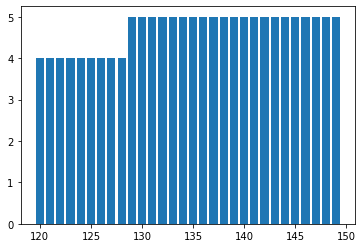

In [24]:
ys = np.fromiter(backbone_output_sizes(backbone_shufflenet_v2_x0_5, xs), dtype='i')
pyplot.bar(xs, ys)

In [25]:
time_backbone(backbone_shufflenet_v2_x0_5, 129)

Inference time: 14 ms averaged over 10 runs


In [26]:
del backbone_shufflenet_v2_x0_5

In [27]:
net = torchvision.models.shufflenet_v2_x1_0()
net.eval()
backbone_shufflenet_v2_x1_0 = nn.Sequential(*[*net.children()][:-1])

<BarContainer object of 30 artists>

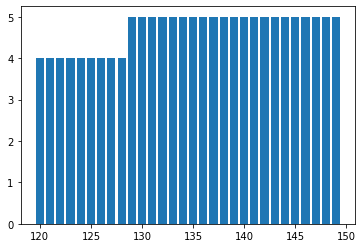

In [28]:
ys = np.fromiter(backbone_output_sizes(backbone_shufflenet_v2_x1_0, xs), dtype='i')
pyplot.bar(xs, ys)

In [29]:
time_backbone(backbone_shufflenet_v2_x1_0, 129)

Inference time: 18 ms averaged over 10 runs


In [31]:
del backbone_shufflenet_v2_x1_0

NameError: name 'backbone_shufflenet_v2_x1_0' is not defined

Inference time: 20 ms averaged over 10 runs


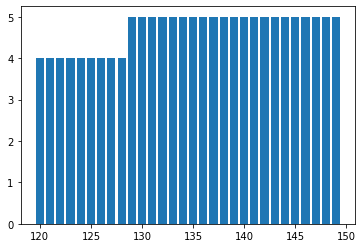

In [32]:
net = torchvision.models.shufflenet_v2_x1_5()
net.eval()
backbone_shufflenet_v2_x1_5 = nn.Sequential(*[*net.children()][:-1])

ys = np.fromiter(backbone_output_sizes(backbone_shufflenet_v2_x1_5, xs), dtype='i')
pyplot.bar(xs, ys)

time_backbone(backbone_shufflenet_v2_x1_5, 129)

del backbone_shufflenet_v2_x1_5

In [33]:
net = torchvision.models.shufflenet_v2_x1_5()
net.eval()
backbone_shufflenet_v2_x1_5 = nn.Sequential(*[*net.children()][:-1])

In [34]:
backbone_shufflenet_v2_x1_5

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 88, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(88, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 88, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(88, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [36]:
backbone_shufflenet_v2_x1_5(torch.rand(1, 3, 129, 129)).shape

torch.Size([1, 1024, 5, 5])

In [23]:
net = torchvision.models.vgg11()
net.eval()
backbone_vgg11 = [*net.children()][0]

<BarContainer object of 30 artists>

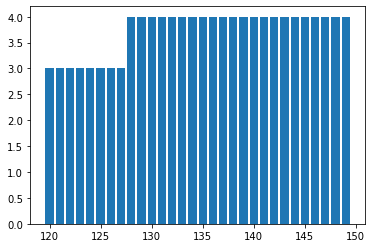

In [24]:
ys = np.fromiter(backbone_output_sizes(backbone_vgg11, xs), dtype='i')
pyplot.bar(xs, ys)

In [25]:
time_backbone(backbone_vgg11, 129)

Inference time: 121 ms averaged over 10 runs
